In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests
import os
import shutil

In [19]:
OUT_DIR = './imgs'
if os.path.exists(OUT_DIR):
    shutil.rmtree(OUT_DIR)

os.mkdir(OUT_DIR)

In [20]:
response = requests.get('https://docs.google.com/spreadsheet/ccc?key=1pG-KbEGtl7QHyF0bolPf2sWN__m63soeGuircwflwV0&output=csv')
with open('results.csv', 'wb') as f:
    f.write(response.content)

In [21]:
serial_time = {
    '15M' : {'Total time':30.73, 'Algo time':23.55},
    '10M' : {'Total time':16.93, 'Algo time':12.84},
    '5M' : {'Total time':9.92, 'Algo time':7.51},
    '1M' : {'Total time':1.34, 'Algo time':0.99},
    # '100K': {'Total time':0.09, 'Algo time':0.08}
}

In [22]:
sns.set_theme()
sns.set(rc={'figure.figsize':(8,5)})

In [23]:
df = pd.read_csv("results.csv")

In [24]:
df.columns

Index(['Informazioni cronologiche', 'Run Status', 'Job Codename',
       'Minimum Distance', 'Cluster job ID', 'Input size',
       'Reading time (seconds)', 'Scattering time (seconds)', 'Submitted on',
       'Github commit SHA', 'Github commit author', 'Output from process 0',
       'Number of CPUs', 'Number of Nodes', 'GB of memory',
       'Maximum duration (minutes)', 'Total run time (seconds)',
       'Placing strategy', 'Bechmark name'],
      dtype='object')

In [25]:
input_sizes = list(serial_time.keys())

df.drop(df[~df['Run Status'].str.contains('successfully')].index, inplace=True)
df['N processes'] = df['Number of CPUs'] * df['Number of Nodes']

df["Speedup"] = df.apply(lambda x: x['Total run time (seconds)']/serial_time[x['Input size']]['Total time'] if x['Input size'] in input_sizes else np.nan, axis=1)
df = df[df['Speedup'].notna()]

df["Efficiency"] = df["Speedup"]/df["N processes"]

df = df.astype({'N processes':'str'})

In [26]:
df.head()


,Informazioni cronologiche,Run Status,Job Codename,Minimum Distance,Cluster job ID,Input size,Reading time (seconds),Scattering time (seconds),Submitted on,Github commit SHA,...,Number of CPUs,Number of Nodes,GB of memory,Maximum duration (minutes),Total run time (seconds),Placing strategy,Bechmark name,N processes,Speedup,Efficiency
100,10/01/2023 16.48.32,Finished successfully 🧸,NaN,2.236068,9124726.hpc-head-n1.unitn.it,1M,0.297424,0.002527,Tue Jan 10 16:48:09 CET 2023,d5a17e1d5179afbe104f7c63fbdc6ce293e3b4ef,...,1,1,1,5,1.581849,pack,fitting-lizard,1,1.180484,1.180484
101,10/01/2023 16.48.54,Finished successfully 🧸,NaN,2.236068,9124730.hpc-head-n1.unitn.it,1M,0.246446,0.003908,Tue Jan 10 16:48:31 CET 2023,d5a17e1d5179afbe104f7c63fbdc6ce293e3b4ef,...,1,1,1,5,1.575881,scatter,fitting-lizard,1,1.176031,1.176031
102,10/01/2023 16.49.18,Finished successfully 🧸,NaN,2.236068,9124732.hpc-head-n1.unitn.it,1M,0.504888,0.004050,Tue Jan 10 16:48:54 CET 2023,d5a17e1d5179afbe104f7c63fbdc6ce293e3b4ef,...,1,1,1,5,1.921141,pack:excl,fitting-lizard,1,1.433687,1.433687
103,10/01/2023 16.49.31,Finished successfully 🧸,NaN,2.236068,9124734.hpc-head-n1.unitn.it,1M,0.575961,0.005321,Tue Jan 10 16:49:18 CET 2023,d5a17e1d5179afbe104f7c63fbdc6ce293e3b4ef,...,1,1,1,5,1.980209,scatter:excl,fitting-lizard,1,1.477768,1.477768
104,10/01/2023 16.49.44,Finished successfully 🧸,NaN,2.236068,9124736.hpc-head-n1.unitn.it,1M,0.196738,0.004628,Tue Jan 10 16:49:31 CET 2023,d5a17e1d5179afbe104f7c63fbdc6ce293e3b4ef,...,1,2,1,5,0.943738,pack,fitting-lizard,2,0.704282,0.352141


In [34]:
def plot_time_by_n_processes_and_placing_strategy(df):
  strategies = ['pack', 'scatter', 'pack:excl', 'scatter:excl']

  ticks = list(df['N processes'].unique())
  plt.xticks(range(0,len(ticks)), ticks)
  
  for strat in strategies:
    data = df[df['Placing strategy'] == strat]
  
    sns.lineplot(data=data, x='N processes', y='Total run time (seconds)', hue='Input size', palette='tab10', errorbar=None, marker="o").set(title=f'{strat} strategy')
    plt.savefig(f'{OUT_DIR}/Total_time_{strat}.svg')
    plt.show()

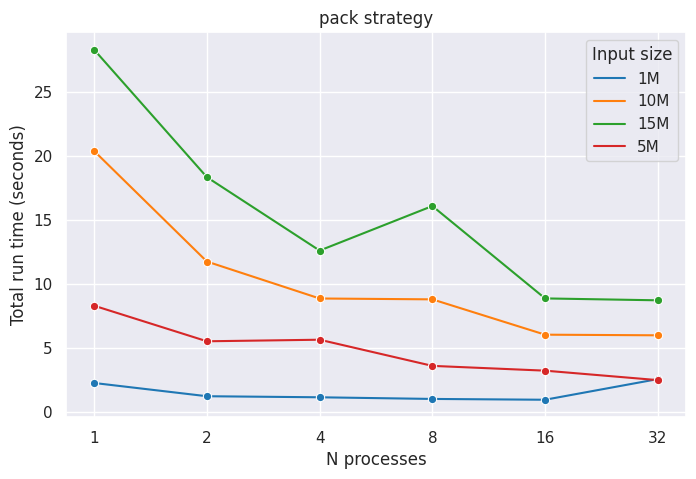

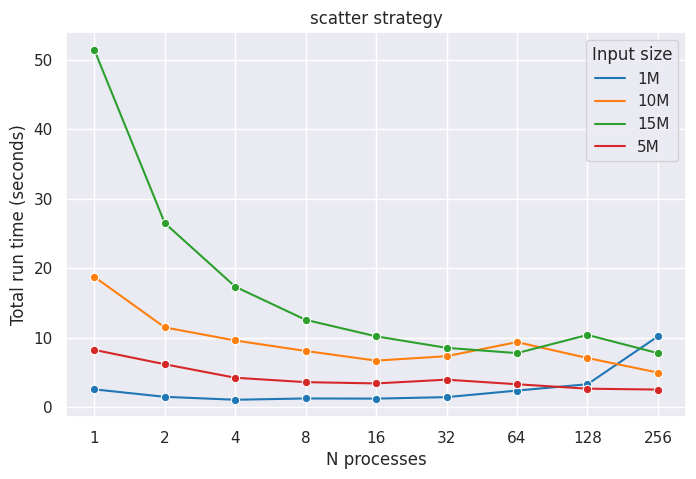

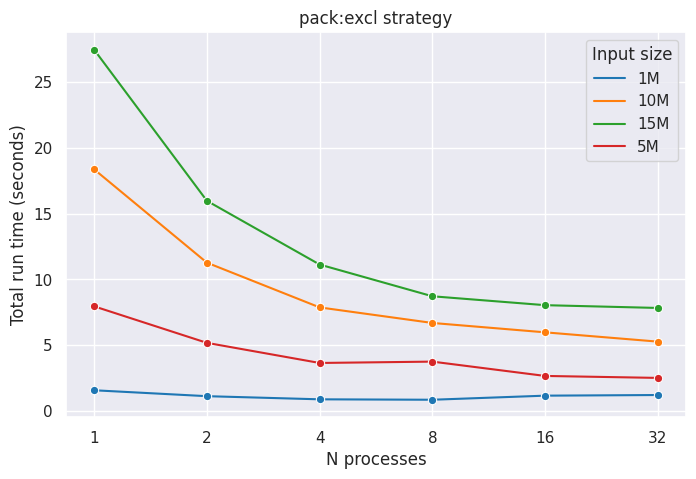

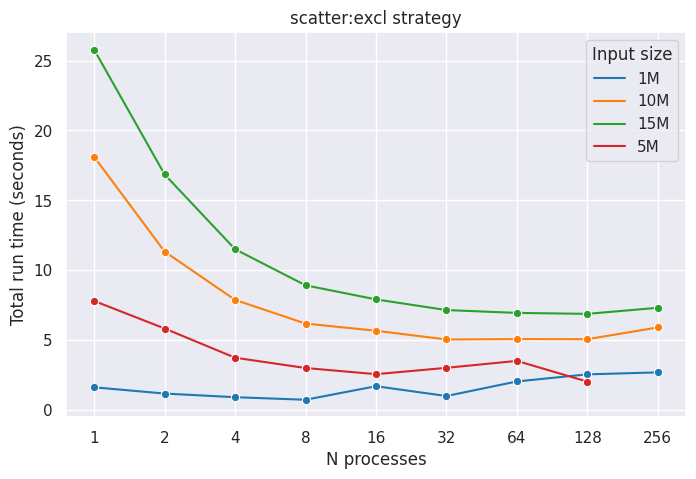

In [35]:
plot_time_by_n_processes_and_placing_strategy(df)

In [29]:
def plot_speedup_by_n_processes_and_placing_strategy(df):
  strategies = ['pack', 'scatter', 'pack:excl', 'scatter:excl']

  ticks = list(df['N processes'].unique())
  plt.xticks(range(0,len(ticks)), ticks)
  
  for strat in strategies:
    data = df[df['Placing strategy'] == strat]

    sns.lineplot(data=data, x='N processes', y='Speedup', hue='Input size', palette='tab10', errorbar=None, marker="o").set(title=f'{strat} strategy')
    plt.savefig(f'{OUT_DIR}/Speedup_{strat}.svg')
    plt.show()

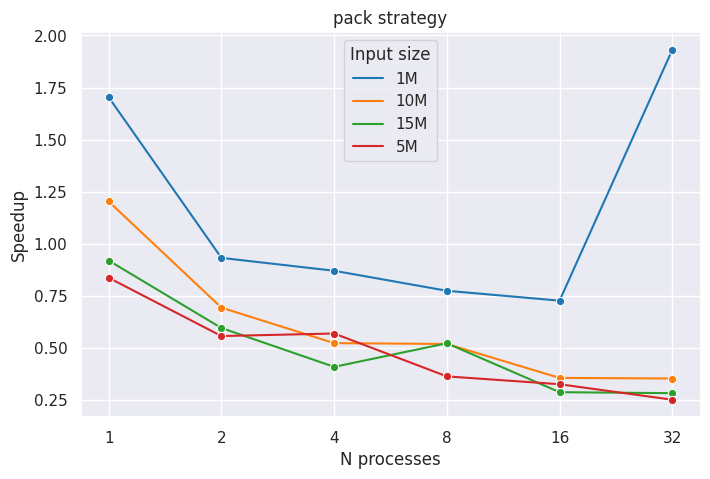

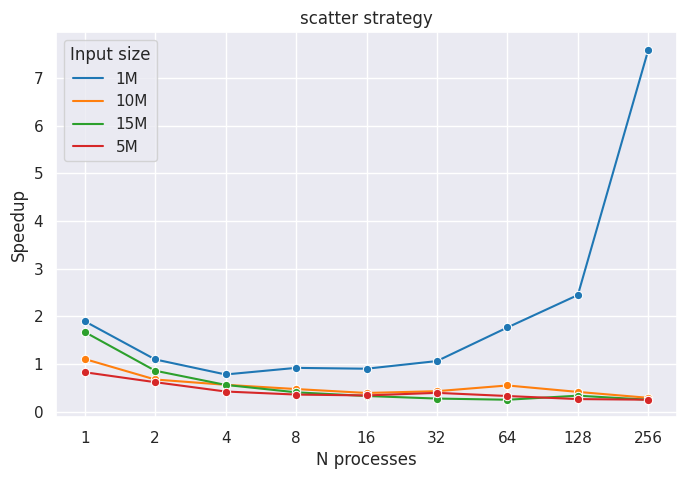

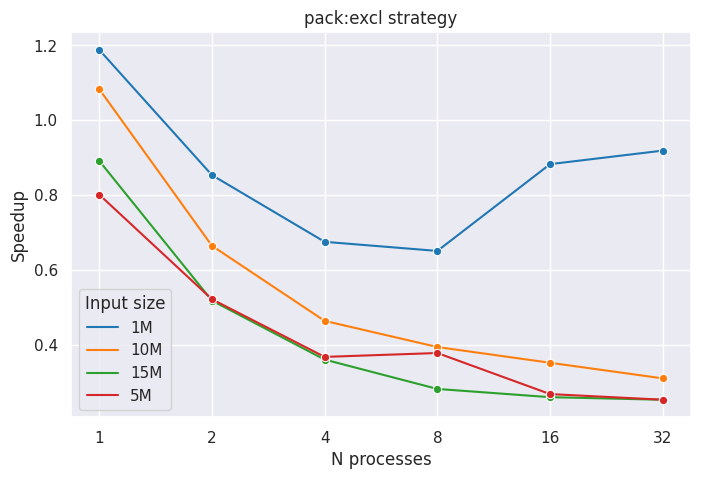

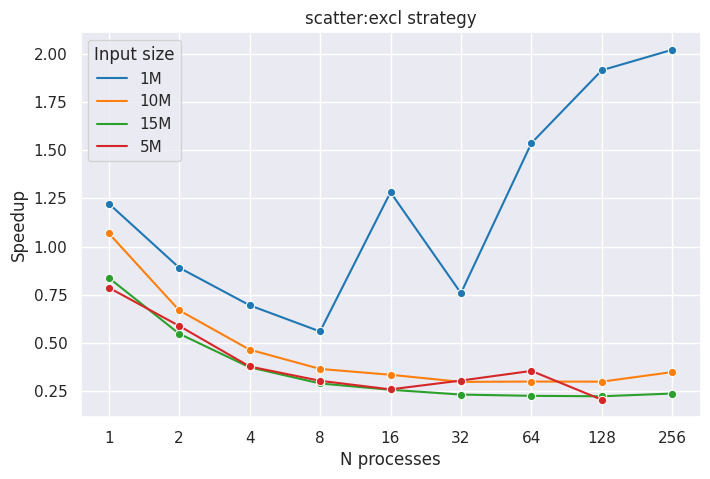

In [30]:
plot_speedup_by_n_processes_and_placing_strategy(df)

In [31]:
def plot_efficiency_by_n_processes_and_placing_strategy(df):
  strategies = ['pack', 'scatter', 'pack:excl', 'scatter:excl']

  ticks = list(df['N processes'].unique())
  plt.xticks(range(0,len(ticks)), ticks)
  
  for strat in strategies:
    data = df[df['Placing strategy'] == strat]

    sns.lineplot(data=data, x='N processes', y='Efficiency', hue='Input size', palette='tab10', errorbar=None, marker="o").set(title=f'{strat} strategy')
    plt.savefig(f'{OUT_DIR}/Efficiency_{strat}.svg')
    plt.show()

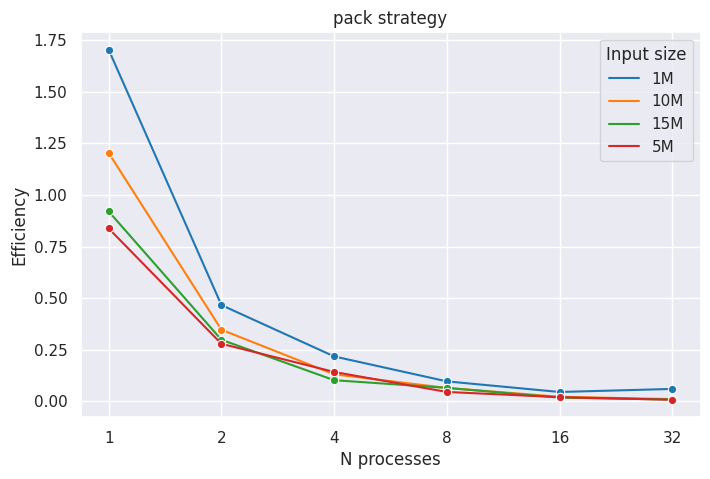

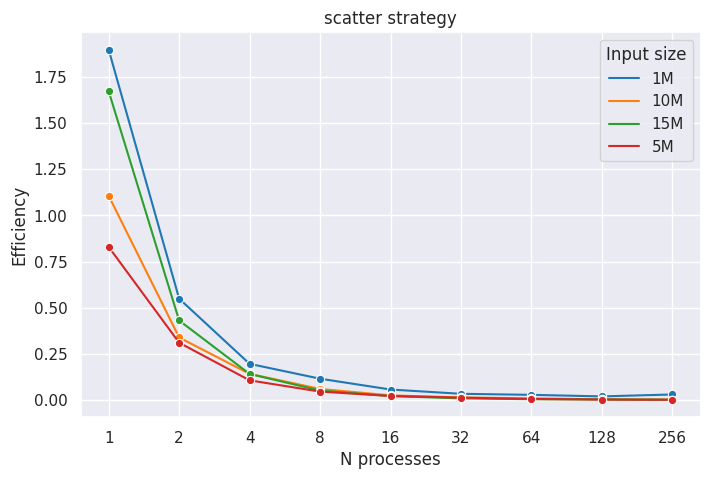

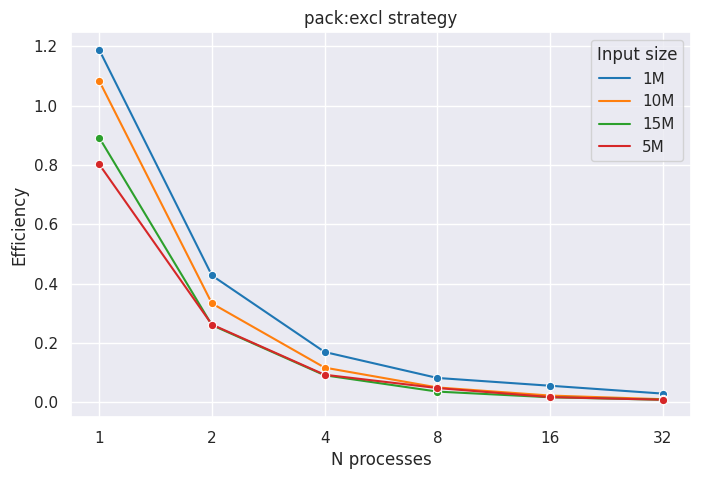

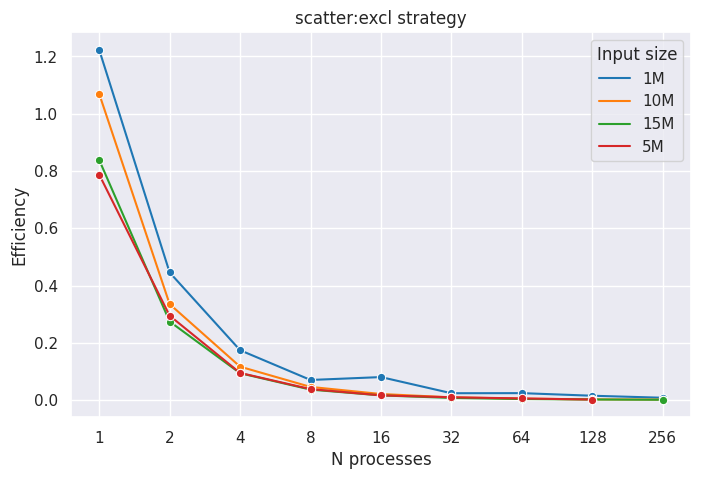

In [32]:
plot_efficiency_by_n_processes_and_placing_strategy(df)